<a href="https://colab.research.google.com/github/AnaMoreira123/final_project_ana_tristan/blob/main/C%C3%B3pia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AVCAD FINAL PROJECT

Link to the Dataset: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi

About Dataset
Coffee Quality Institute
The Coffee Quality Institute (CQI) is a non-profit organization that works to improve the quality and value of coffee worldwide. It was founded in 1996 and has its headquarters in California, USA.

CQI's mission is to promote coffee quality through a range of activities that include research, training, and certification programs. The organization works with coffee growers, processors, roasters, and other stakeholders to improve coffee quality standards, promote sustainability, and support the development of the specialty coffee industry.



# DOWNLOADING THE DATA

In [ ]:
!pip install kaggle
!pip install plotly pandas

!kaggle datasets download -d fatihb/coffee-quality-data-cqi

import zipfile
with zipfile.ZipFile('coffee-quality-data-cqi.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

import pandas as pd
data = pd.read_csv('df_arabica_clean.csv')

Dataset URL: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi
License(s): other
coffee-quality-data-cqi.zip: Skipping, found more recently modified local copy (use --force to force download)


# DATA DESCRIPTION



In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('df_arabica_clean.csv')

# Set display options to show all columns and wrap text
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Unwrap text in columns

# Display the first few rows of the dataset
data.head().style.set_properties(**{'text-align': 'left'})


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,nan,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,10.000000,10.000000,10.000000,8.580000,0.000000,89.330000,11.800000,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,nan,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.500000,8.500000,7.920000,8.000000,7.920000,8.250000,10.000000,10.000000,10.000000,8.500000,0.000000,87.580000,10.500000,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,nan,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.330000,8.420000,8.080000,8.170000,7.920000,8.170000,10.000000,10.000000,10.000000,8.330000,0.000000,87.420000,10.400000,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,nan,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.080000,8.170000,8.170000,8.250000,8.170000,8.080000,10.000000,10.000000,10.000000,8.250000,0.000000,87.170000,11.800000,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,nan,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.330000,8.330000,8.080000,8.250000,7.920000,7.920000,10.000000,10.000000,10.000000,8.250000,0.000000,87.080000,11.600000,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


# DATA CLEANING


In [ ]:

import pandas as pd

# Load the dataset
data = pd.read_csv('df_arabica_clean.csv')

# List of columns to drop if they exist
columns_to_drop = ['ID', 'ICO Number', 'Owner', 'Region', 'Certification Contact',
                   'Certification Address', 'Farm Name', 'Lot Number', 'Mill',
                   'ICO Number', 'Producer', 'Harvest Year', 'Unnamed: 0',
                   'In-Country Partner', 'Grading Date', 'Status', 'Certification Body']

# Drop columns if they exist in the dataframe
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

data_display = data.head(110).copy()

# Style the DataFrame for better readability
styled_data = data_display.style.set_properties(**{'text-align': 'left'})  # Left-align text

# Render the styled DataFrame
styled_data


,Country of Origin,Company,Altitude,Number of Bags,Bag Weight,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration
0,Colombia,Coffee Quality Union,1700-1930,1,35 kg,Castillo,Double Anaerobic Washed,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,10.000000,10.000000,10.000000,8.580000,0.000000,89.330000,11.800000,0,0,green,3,"September 21st, 2023"
1,Taiwan,Taiwan Coffee Laboratory,1200,1,80 kg,Gesha,Washed / Wet,8.500000,8.500000,7.920000,8.000000,7.920000,8.250000,10.000000,10.000000,10.000000,8.500000,0.000000,87.580000,10.500000,0,0,blue-green,0,"November 15th, 2023"
2,Laos,Taiwan Coffee Laboratory,1300,19,25 kg,Java,Semi Washed,8.330000,8.420000,8.080000,8.170000,7.920000,8.170000,10.000000,10.000000,10.000000,8.330000,0.000000,87.420000,10.400000,0,0,yellowish,2,"November 15th, 2023"
3,Costa Rica,Coffee Quality Union,1900,1,22 kg,Gesha,Washed / Wet,8.080000,8.170000,8.170000,8.250000,8.170000,8.080000,10.000000,10.000000,10.000000,8.250000,0.000000,87.170000,11.800000,0,0,green,0,"September 21st, 2023"
4,Colombia,Coffee Quality Union,1850-2100,2,24 kg,Red Bourbon,"Honey,Mossto",8.330000,8.330000,8.080000,8.250000,7.920000,7.920000,10.000000,10.000000,10.000000,8.250000,0.000000,87.080000,11.600000,0,2,yellow-green,2,"March 5th, 2024"
5,Guatemala,Taiwan Coffee Laboratory,1668,5,30 kg,Gesha,Washed / Wet,8.330000,8.330000,8.250000,7.830000,7.830000,8.170000,10.000000,10.000000,10.000000,8.250000,0.000000,87.000000,10.700000,0,0,green,2,"November 15th, 2023"
6,Taiwan,Taiwan Coffee Laboratory,1250,1,27 kg,Gesha,Washed / Wet,8.330000,8.170000,8.080000,8.000000,7.830000,8.250000,10.000000,10.000000,10.000000,8.250000,0.000000,86.920000,9.100000,0,0,green,0,"November 15th, 2023"
7,Taiwan,Taiwan Coffee Laboratory,1200,1,90 kg,Sl34+Gesha,Natural / Dry,8.250000,8.250000,8.170000,8.000000,7.920000,8.080000,10.000000,10.000000,10.000000,8.080000,0.000000,86.750000,10.000000,0,0,yellow green,1,"November 15th, 2023"
8,Taiwan,Taiwan Coffee Laboratory,1250,1,30 kg,SL34,Washed / Wet,8.080000,8.080000,8.250000,8.080000,7.920000,8.000000,10.000000,10.000000,10.000000,8.250000,0.000000,86.670000,10.800000,0,0,greenish,0,"November 15th, 2023"
9,"Tanzania, United Republic Of",DORMAN (T) LIMITED,1400-1700,320,60 kg,Bourbon,Washed / Wet,8.080000,8.170000,8.080000,8.170000,8.000000,8.000000,10.000000,10.000000,10.000000,8.000000,0.000000,86.500000,11.000000,0,0,greenish,0,"February 1st, 2024"


Remove NaN Data

In [ ]:
# Check for NaN values in the dataset
print(data.isnull().sum())

Country of Origin       0
Company                 0
Altitude                1
Number of Bags          0
Bag Weight              0
Variety                 6
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64


In [ ]:
# Filter rows where 'Altitude' is NaN
missing_altitude_countries = data[data['Altitude'].isnull()]['Country of Origin'].unique()

print("Countries with missing altitude values:")
for country in missing_altitude_countries:
    print(country)



Countries with missing altitude values:
Colombia


# DATA VIZUALISATION

In [ ]:
import pandas as pd
import plotly.express as px


data = pd.read_csv('df_arabica_clean.csv')

columns_to_drop = ['ID', 'ICO Number', 'Owner', 'Region', 'Certification Contact', 'Certification Address',
'Farm Name', 'Lot Number', 'Mill', 'ICO Number', 'Producer', 'Harvest Year', 'Unnamed: 0',
'In-Country Partner', 'Grading Date', 'Status', 'Certification Body']


data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


def map_country_to_continent(country):
# Mapping country to continent
 if country in ['United States', 'Canada', 'Mexico']:
  return 'North America'
 elif country in ['Brazil', 'Argentina', 'Chile']:
   return 'South America'
 elif country in ['United Kingdom', 'Germany', 'France']:
   return 'Europe'
 elif country in ['China', 'India', 'Japan']:
   return 'Asia'
 elif country in ['South Africa', 'Nigeria', 'Kenya']:
   return 'Africa'
 else:
   return 'Other'

data['Continent'] = data['Country of Origin'].apply(map_country_to_continent)

top_countries = data['Country of Origin'].value_counts().head(10).index
filtered_data = data[data['Country of Origin'].isin(top_countries)]

fig = px.scatter_geo(filtered_data,
locations="Country of Origin",
locationmode='country names',
size="Total Cup Points",
hover_name="Country of Origin",
title="Top 10 Countries of Origin for Coffee",
projection="natural earth")

fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

<ipython-input-42-dd5a11e46b14>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




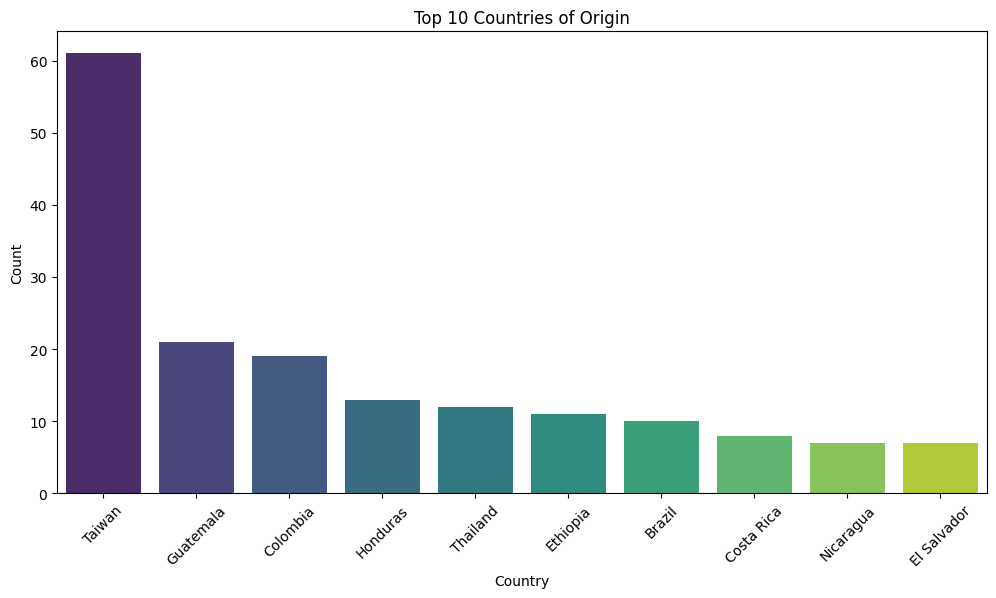

<ipython-input-42-dd5a11e46b14>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




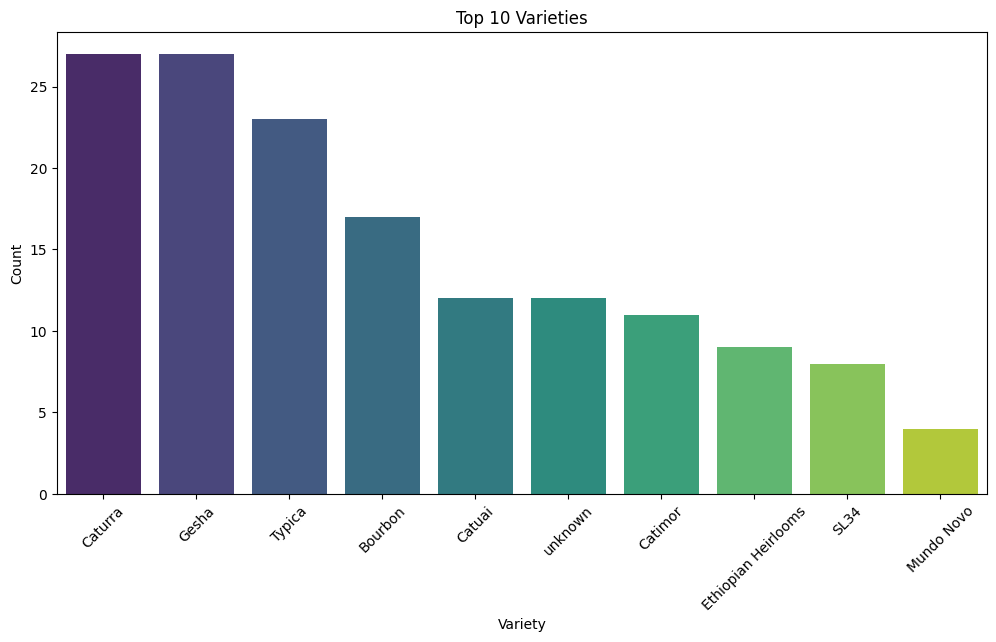

<ipython-input-42-dd5a11e46b14>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




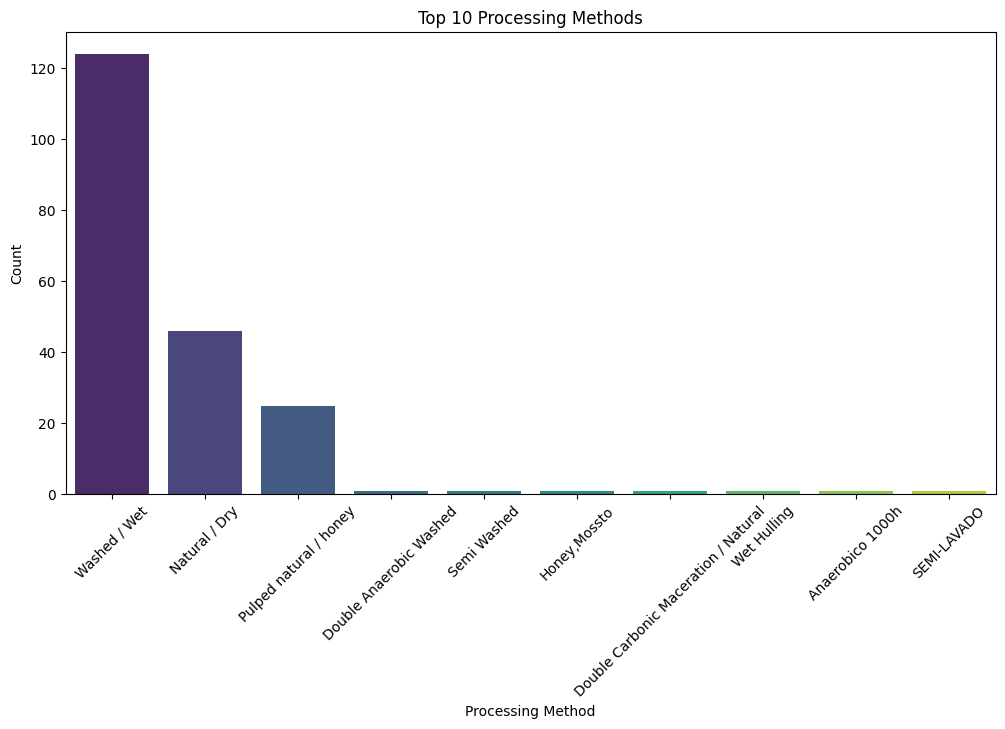

<ipython-input-42-dd5a11e46b14>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




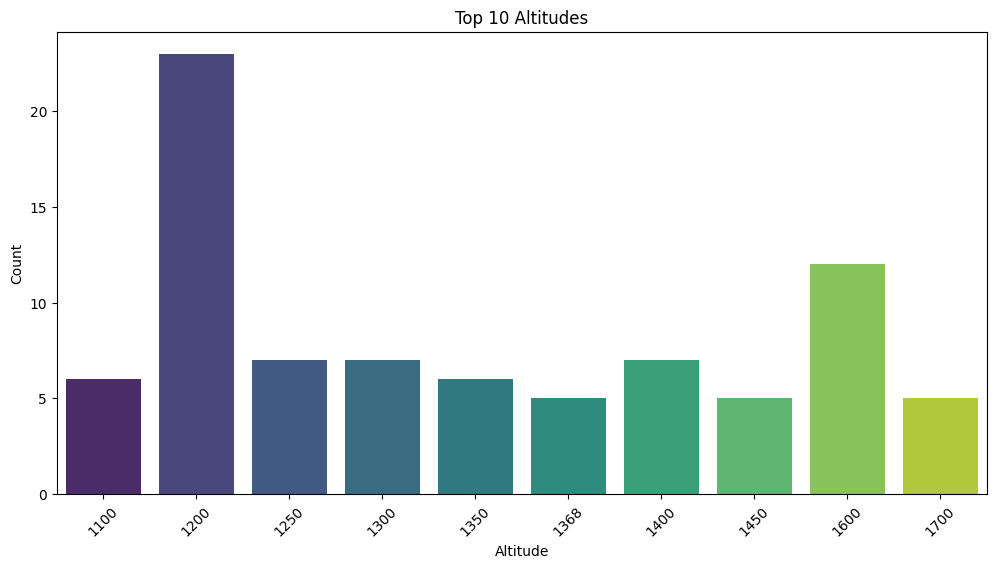

<ipython-input-42-dd5a11e46b14>:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




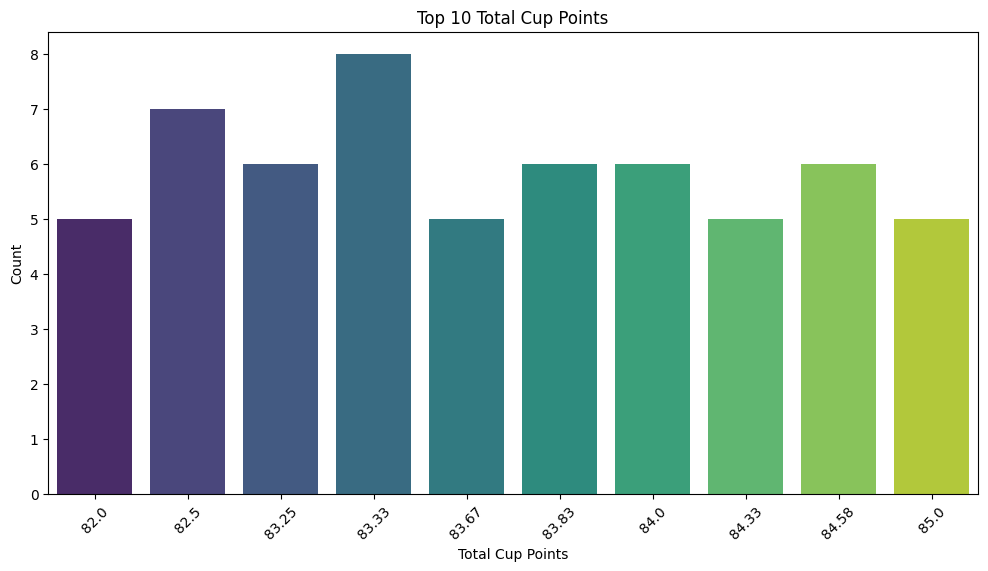

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Plot histograms for top 10 values of different features
# Top 10 Countries of Origin
plt.figure(figsize=(12, 6))
top_countries = data['Country of Origin'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Countries of Origin')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Varieties
plt.figure(figsize=(12, 6))
top_varieties = data['Variety'].value_counts().head(10)
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="viridis")
plt.title('Top 10 Varieties')
plt.xlabel('Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Processing Methods
plt.figure(figsize=(12, 6))
top_processing_methods = data['Processing Method'].value_counts().head(10)
sns.barplot(x=top_processing_methods.index, y=top_processing_methods.values, palette="viridis")
plt.title('Top 10 Processing Methods')
plt.xlabel('Processing Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Altitudes
plt.figure(figsize=(12, 6))
data['Altitude'] = pd.to_numeric(data['Altitude'], errors='coerce')
top_altitudes = data['Altitude'].dropna().astype(int).value_counts().head(10)
sns.barplot(x=top_altitudes.index, y=top_altitudes.values, palette="viridis")
plt.title('Top 10 Altitudes')
plt.xlabel('Altitude')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 Total Cup Points
plt.figure(figsize=(12, 6))
top_cup_points = data['Total Cup Points'].value_counts().head(10)
sns.barplot(x=top_cup_points.index, y=top_cup_points.values, palette="viridis")
plt.title('Top 10 Total Cup Points')
plt.xlabel('Total Cup Points')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# PCA to understand the features that influence the 'total cup point'

In [ ]:
# Selected columns
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                     'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage',
                     'Category One Defects', 'Quakers', 'Category Two Defects']

# Subset data with selected columns
selected_data = data[categorical_columns + numerical_columns]

# Display the first few rows to verify
selected_data.head()

,Processing Method,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,Double Anaerobic Washed,NaN,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,3
1,Washed / Wet,1200.0,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,0
2,Semi Washed,1300.0,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,10.4,0,0,2
3,Washed / Wet,1900.0,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,11.8,0,0,0
4,"Honey,Mossto",NaN,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,11.6,0,2,2


# Corelation (heatmap)

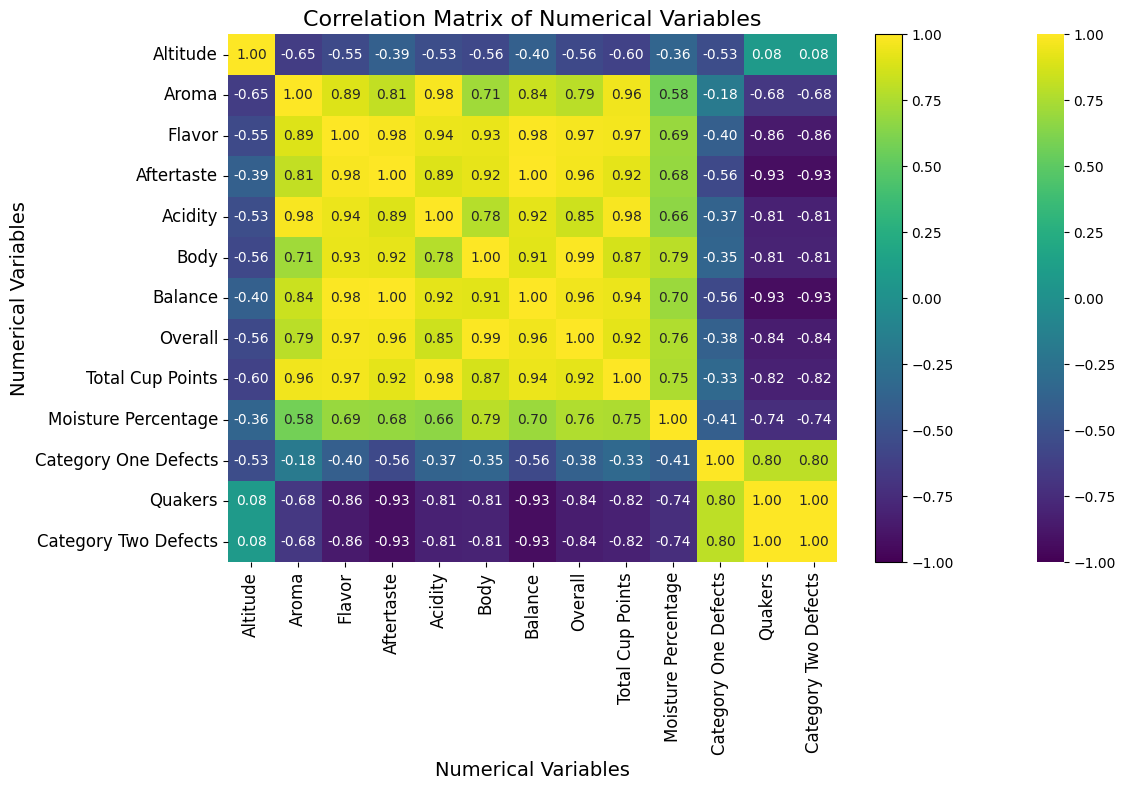

Total Cup Points        1.000000
Acidity                 0.982946
Flavor                  0.967247
Aroma                   0.959024
Balance                 0.937937
Aftertaste              0.918630
Overall                 0.918559
Body                    0.868092
Moisture Percentage     0.750577
Category One Defects   -0.327327
Altitude               -0.604390
Quakers                -0.816497
Category Two Defects   -0.816497
Name: Total Cup Points, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'Processing Method': ['Washed', 'Natural', 'Honey', 'Washed', 'Natural'],
    'Altitude': ['1700-1930', '1500-1800', '1600-1900', '1700-1950', '1550-1750'],
    'Aroma': [7.5, 8.0, 7.2, 7.8, 8.5],
    'Flavor': [8.0, 8.2, 7.5, 7.9, 8.3],
    'Aftertaste': [7.8, 7.9, 7.0, 7.6, 8.0],
    'Acidity': [7.2, 7.5, 6.8, 7.4, 7.8],
    'Body': [7.5, 7.8, 7.0, 7.3, 7.6],
    'Balance': [8.0, 8.1, 7.4, 7.9, 8.2],
    'Overall': [8.2, 8.5, 7.6, 8.0, 8.4],
    'Total Cup Points': [87.5, 89.0, 86.0, 88.0, 89.5],
    'Moisture Percentage': [10.0, 11.0, 9.5, 10.5, 10.2],
    'Category One Defects': [0, 1, 2, 0, 1],
    'Quakers': [0, 0, 1, 0, 0],
    'Category Two Defects': [0, 0, 1, 0, 0]
})

# Convert Altitude to numeric
def extract_average_altitude(altitude_range):
    # Assuming altitude_range is in the format "min-max"
    try:
        min_alt, max_alt = map(float, altitude_range.split('-'))
        return (min_alt + max_alt) / 2
    except ValueError:
        return None  # Handle invalid values

data['Altitude'] = data['Altitude'].apply(extract_average_altitude)

# Selected columns
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                     'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage',
                     'Category One Defects', 'Quakers', 'Category Two Defects']

# Subset data with selected columns
selected_data = data[categorical_columns + numerical_columns]

# Calculate correlation matrix
correlation_matrix = selected_data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1)

# Customize plot
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.xlabel('Numerical Variables', fontsize=14)
plt.ylabel('Numerical Variables', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Add colorbar using ScalarMappable object
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])  # dummy array for the colorbar
cbar = plt.colorbar(sm, ax=heatmap)

plt.show()

# Focus on correlations with Total Cup Points
correlations_with_total_cup_points = correlation_matrix['Total Cup Points'].sort_values(ascending=False)
print(correlations_with_total_cup_points)




# Pair plot

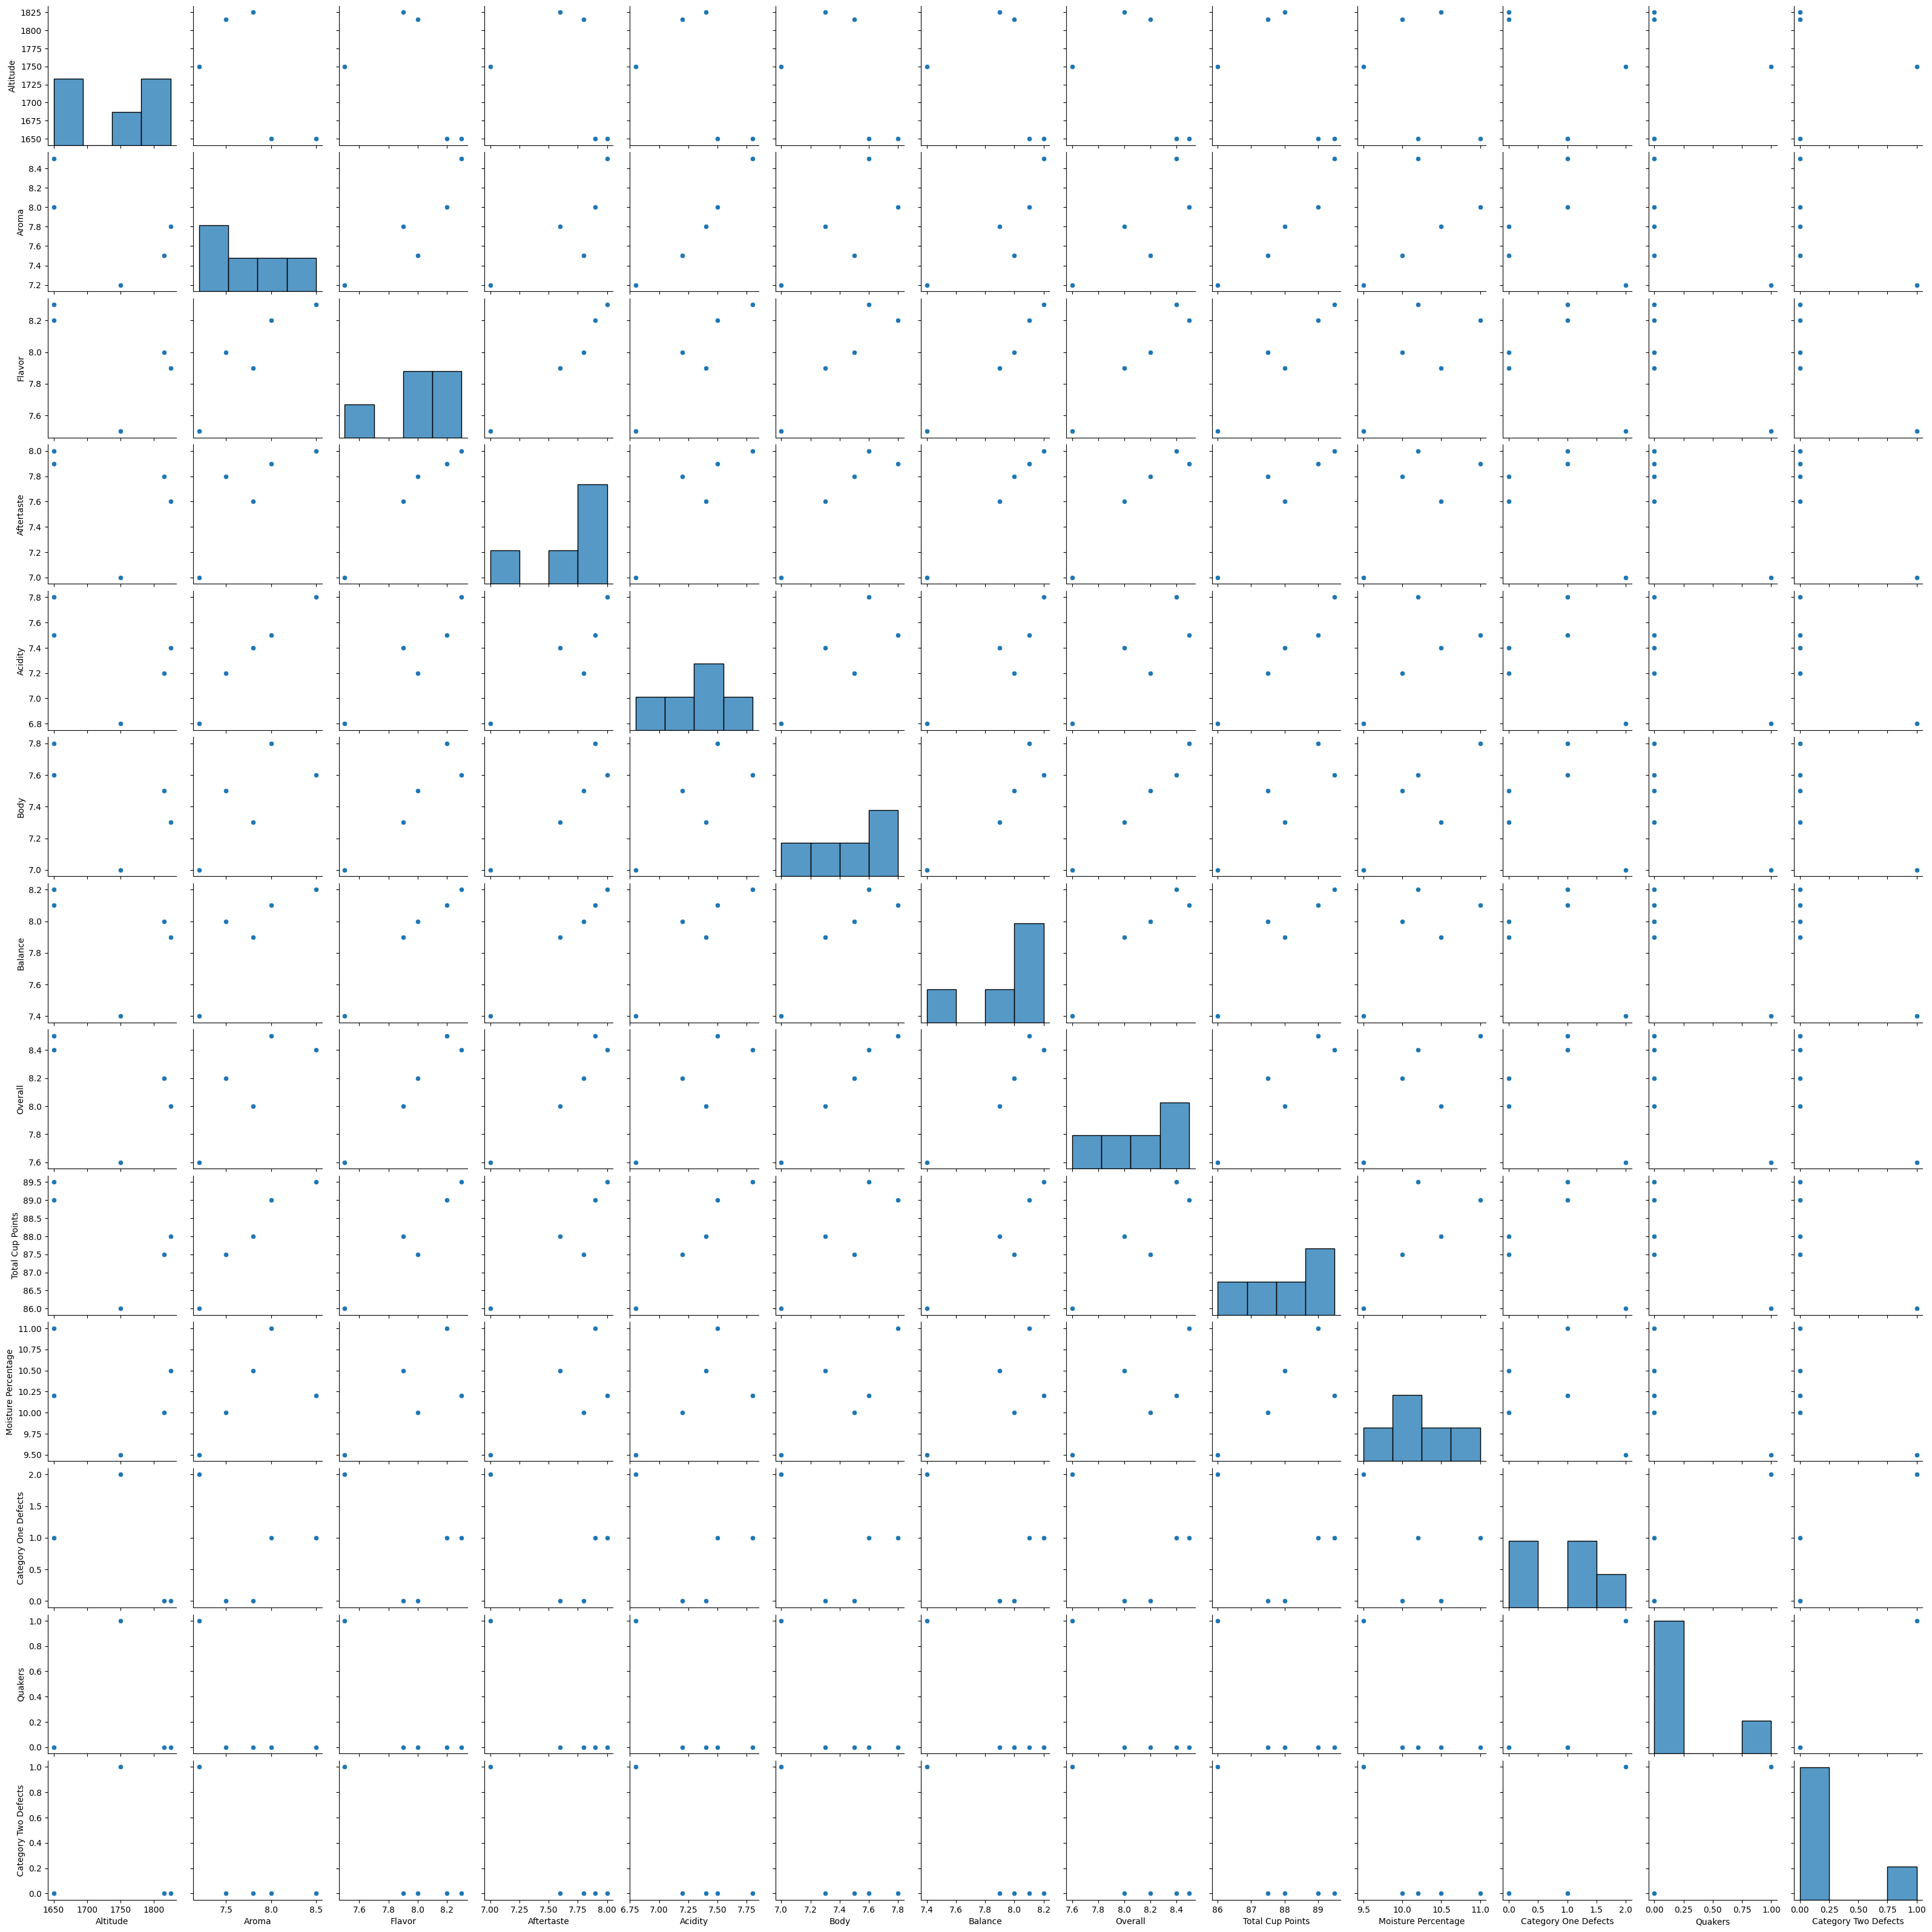

Linear Patterns Detected from Pairplot:

The relationship between 'Aroma' and 'Flavor' shows a positive linear pattern with a correlation coefficient of 0.82.
The relationship between 'Aroma' and 'Aftertaste' shows a positive linear pattern with a correlation coefficient of 0.79.
The relationship between 'Aroma' and 'Acidity' shows a positive linear pattern with a correlation coefficient of 0.71.
The relationship between 'Aroma' and 'Body' shows a positive linear pattern with a correlation coefficient of 0.63.
The relationship between 'Aroma' and 'Balance' shows a positive linear pattern with a correlation coefficient of 0.75.
The relationship between 'Aroma' and 'Overall' shows a positive linear pattern with a correlation coefficient of 0.80.
The relationship between 'Aroma' and 'Total Cup Points' shows a positive linear pattern with a correlation coefficient of 0.87.
The relationship between 'Flavor' and 'Aftertaste' shows a positive linear pattern with a correlation coefficient of 0

In [67]:
!pip install scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                     'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage',
                     'Category One Defects', 'Quakers', 'Category Two Defects']

# Remove rows with NaN values in numerical columns
data = data[numerical_columns].dropna()
# Pairplot for numerical columns
sns.pairplot(selected_data[numerical_columns])
plt.show()


# Function to find linear patterns
def detect_linear_patterns(data, numerical_columns):
    patterns = []
    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i+1:]:
            try:
                slope, intercept, r_value, p_value, std_err = linregress(data[col1], data[col2])
                if abs(r_value) > 0.5:  # Consider a linear relationship if |r| > 0.5
                    direction = 'positive' if slope > 0 else 'negative'
                    patterns.append(f"The relationship between '{col1}' and '{col2}' shows a {direction} linear pattern with a correlation coefficient of {r_value:.2f}.")
            except (ValueError, TypeError):
                continue  # Skip if there's an issue with the data types
    return patterns

# Detect and print linear patterns
linear_patterns = detect_linear_patterns(data, numerical_columns)
print("Linear Patterns Detected from Pairplot:\n")
for pattern in linear_patterns:
    print(pattern)

# Random forest to find the most important features related to total cup point

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:

data = pd.read_csv('df_arabica_clean.csv')

# Selected numerical columns (excluding 'Total Cup Points' as it's the target)
numerical_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                      'Balance', 'Overall', 'Moisture Percentage', 'Category One Defects',
                      'Quakers', 'Category Two Defects']



# Target variable
target_variable = 'Total Cup Points'

# Create feature matrix X and target array y
X = data[numerical_features]
y = data[target_variable]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

<ipython-input-50-45b27a402989>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




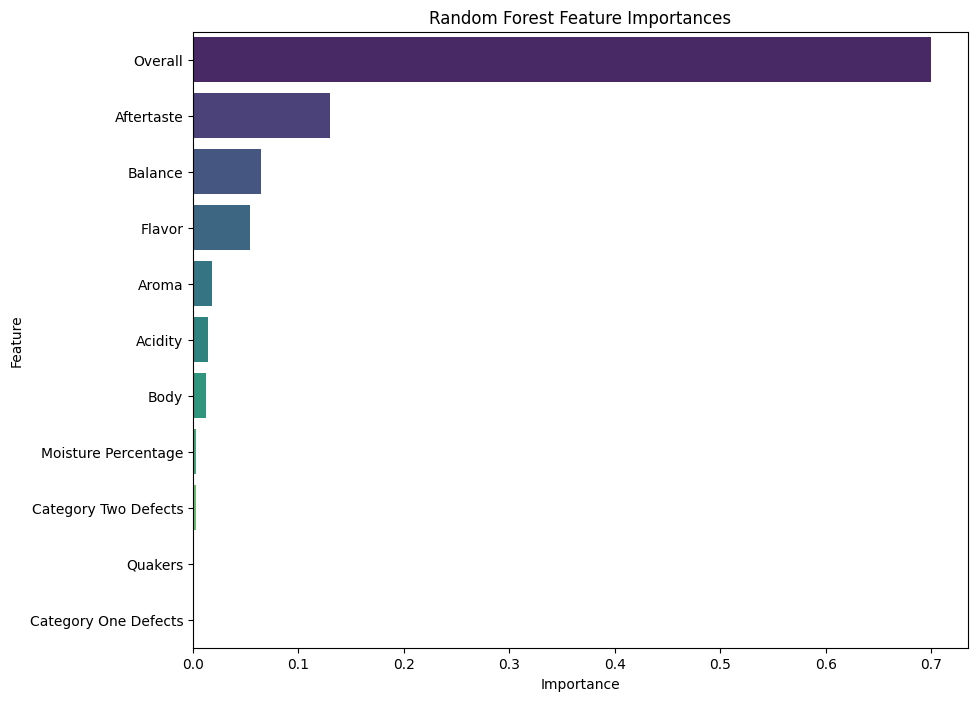

                 Feature  Importance
6                Overall    0.699756
2             Aftertaste    0.129984
5                Balance    0.065033
1                 Flavor    0.054283
0                  Aroma    0.017806
3                Acidity    0.014084
4                   Body    0.012191
7    Moisture Percentage    0.003191
10  Category Two Defects    0.003033
9                Quakers    0.000555
8   Category One Defects    0.000082


In [ ]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(feature_importance_df)


PCA ANALYSIS

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('df_arabica_clean.csv')

# Apply mapping to create 'Continent' column
data['Continent'] = data['Country of Origin'].apply(map_country_to_continent)

# Selecting numeric columns for PCA
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Handling missing values by filling with the mean of the column
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Initialize PCA with the number of components
pca = PCA(n_components=2)
scaler = StandardScaler()
X_final = scaler.fit_transform(data[numeric_cols])

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)


# Fit PCA and transform the data
X_pca = pca.fit_transform(X_final)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Define the categorical features to add back to the PCA DataFrame
categorical_features = ['Processing Method', 'Country of Origin', 'Variety', 'Continent']

# Add categorical information back to the DataFrame
pca_df = pd.concat([pca_df, data[categorical_features].reset_index(drop=True)], axis=1)




Explained variance ratio: [0.56210442 0.09199169]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv('df_arabica_clean.csv')

numerical_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                      'Balance', 'Overall', 'Moisture Percentage', 'Category One Defects',
                      'Quakers', 'Category Two Defects']

categorical_features = ['Processing Method', 'Country of Origin', 'Variety']

# Select numerical and categorical data
X_numerical = data[numerical_features]

# Standardize numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Perform PCA on the standardized numerical features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numerical_scaled)

# Combine PCA results with categorical data for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data[categorical_features]], axis=1)

print(pca_df.head())
# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


        PC1       PC2        Processing Method Country of Origin      Variety
0 -7.613056 -1.930077  Double Anaerobic Washed          Colombia     Castillo
1 -5.387423 -0.177770             Washed / Wet            Taiwan        Gesha
2 -5.088595 -0.529841              Semi Washed              Laos         Java
3 -4.886634 -0.793788             Washed / Wet        Costa Rica        Gesha
4 -4.381625 -1.537602             Honey,Mossto          Colombia  Red Bourbon
Explained variance ratio: [0.55318651 0.1247073 ]


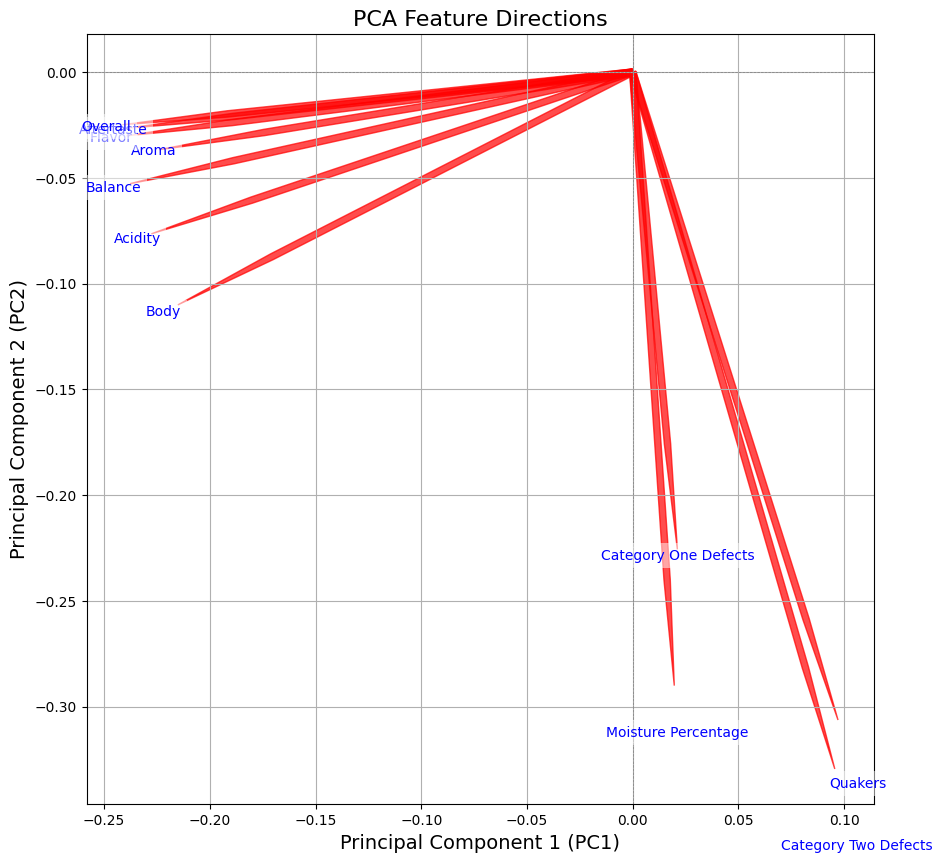

In [ ]:

plt.figure(figsize=(12, 10))
arrow_scale = 0.5  # Escala para diminuir o tamanho das setas
for i, feature in enumerate(numerical_features):
    plt.arrow(0, 0, pca.components_[0, i] * arrow_scale, pca.components_[1, i] * arrow_scale,
              color='r', alpha=0.7, head_width=0.003, head_length=0.05, width=0.003)
    plt.text(pca.components_[0, i] * arrow_scale * 1.3, pca.components_[1, i] * arrow_scale * 1.3, feature,
             color='b', ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.title('PCA Feature Directions', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Dataset URL: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi
License(s): other
coffee-quality-data-cqi.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  coffee-quality-data-cqi.zip
  inflating: df_arabica_clean.csv    
Explained variance ratio: [0.51064383 0.10265225]


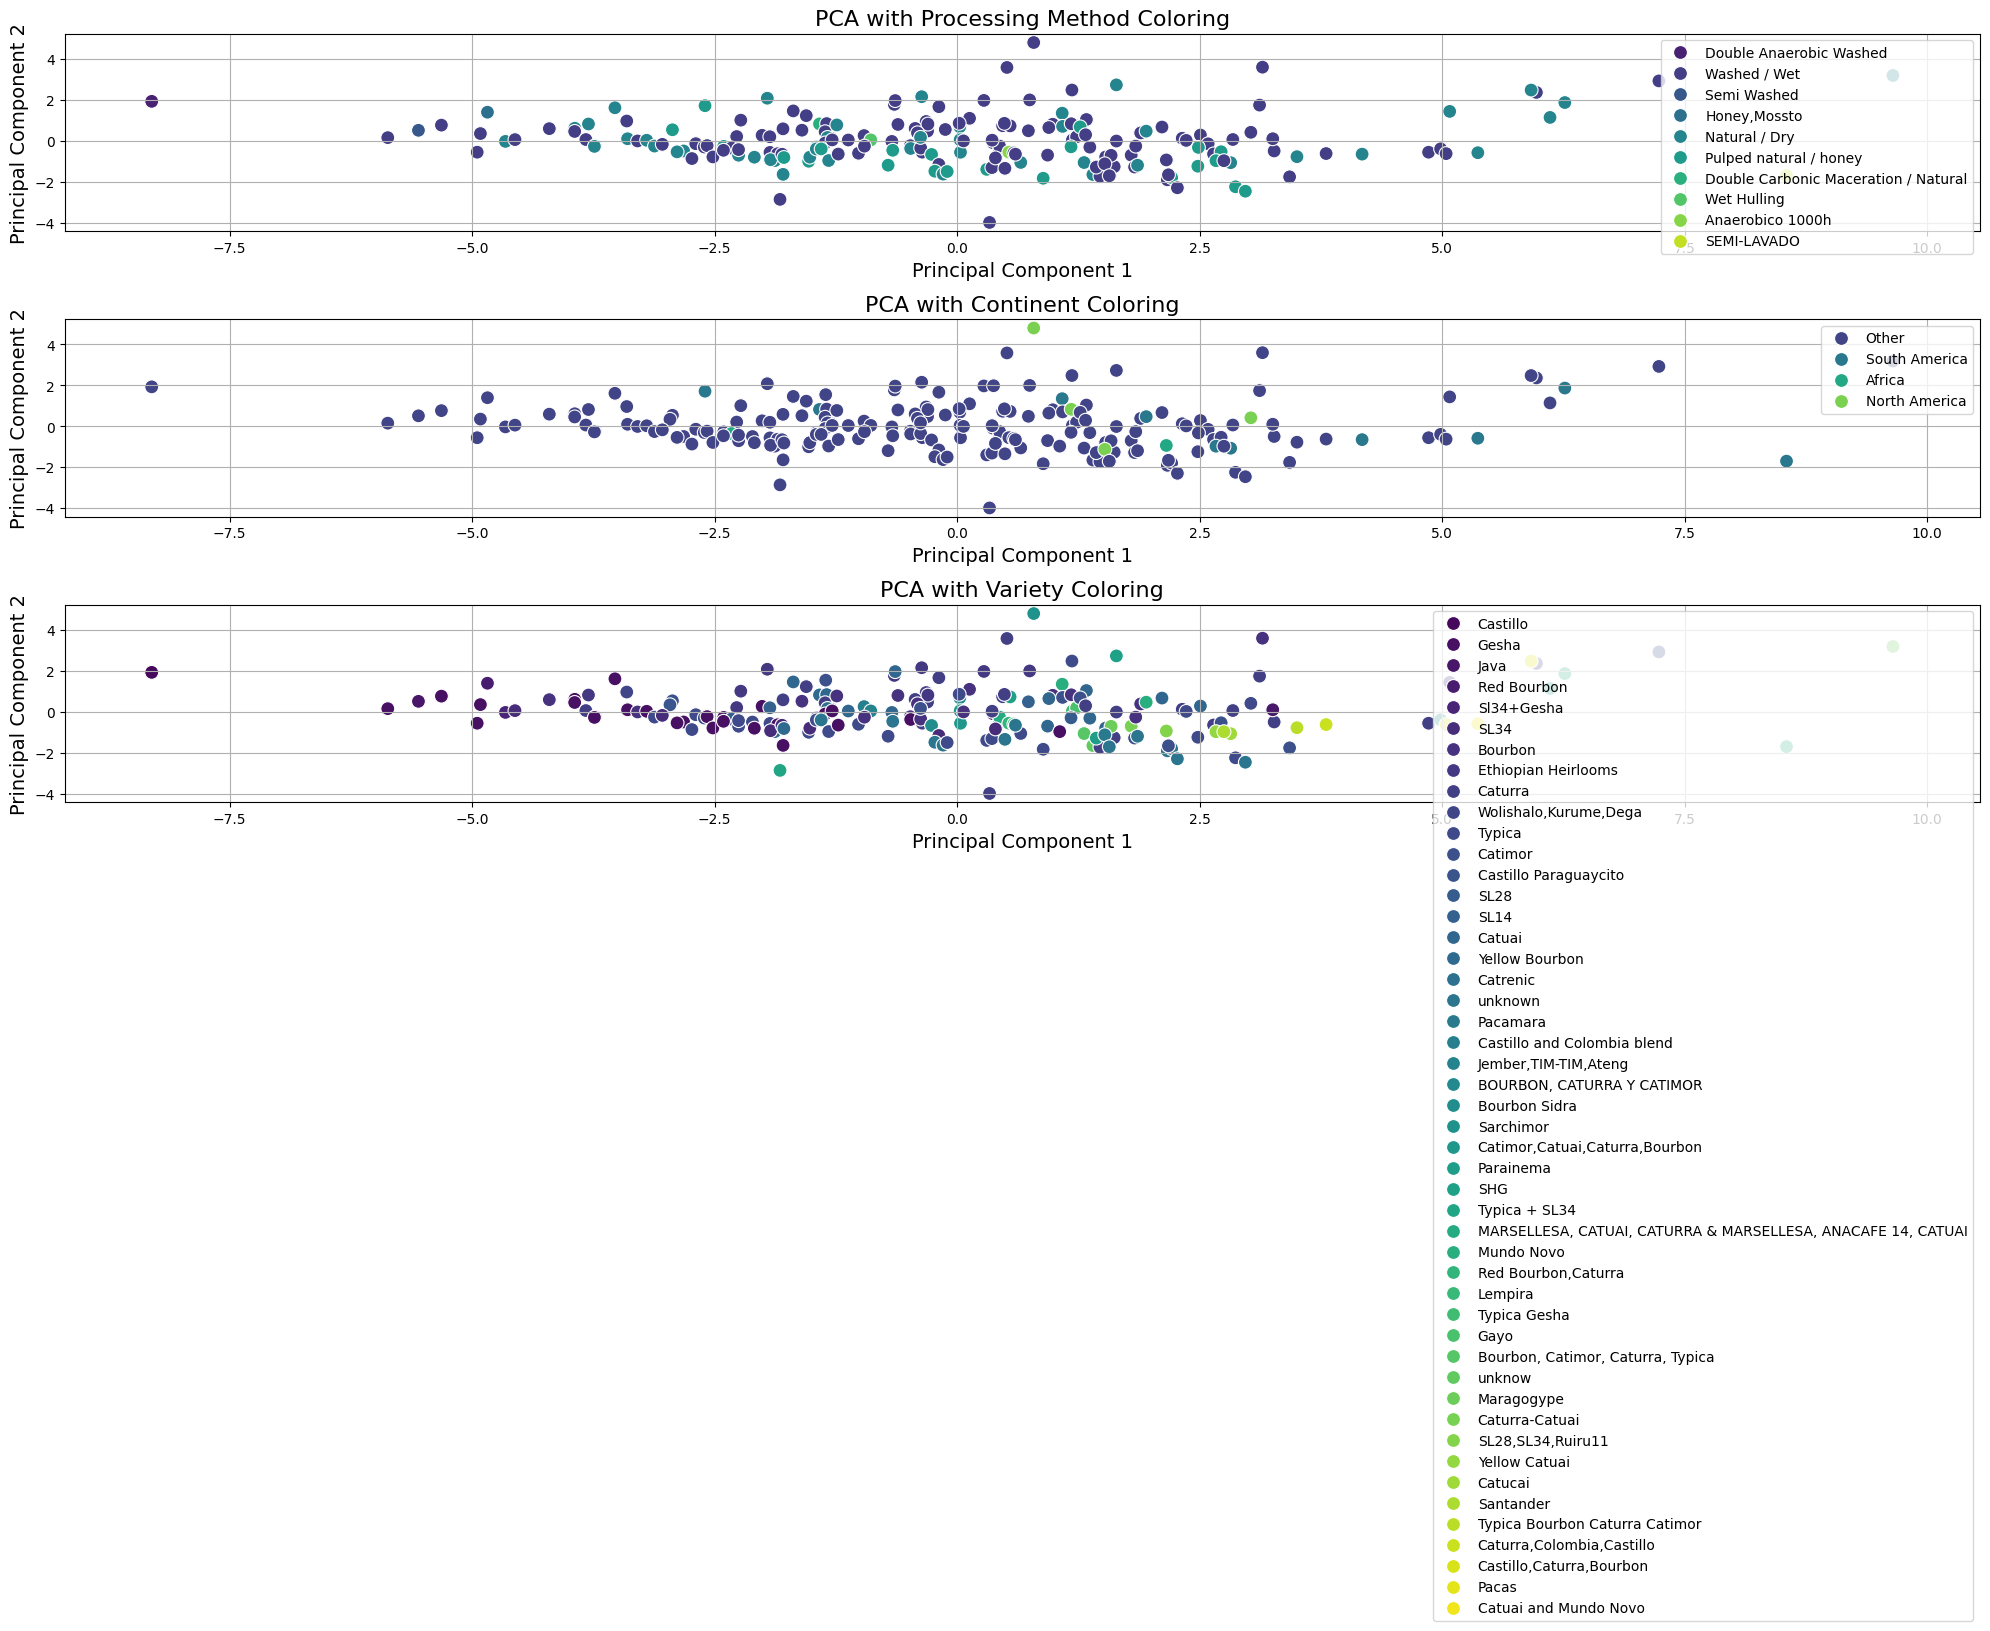

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Download the dataset from Kaggle (make sure you have Kaggle API configured)
!kaggle datasets download -d fatihb/coffee-quality-data-cqi
!unzip -o coffee-quality-data-cqi.zip

# Load the dataset
data = pd.read_csv('df_arabica_clean.csv')

# Drop unnecessary columns
columns_to_drop = ['ID', 'ICO Number', 'Owner', 'Region', 'Certification Contact', 'Certification Address',
                   'Farm Name', 'Lot Number', 'Mill', 'ICO Number', 'Producer', 'Harvest Year', 'Unnamed: 0',
                   'In-Country Partner', 'Grading Date', 'Status', 'Certification Body']

data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Function to map countries to continents
def map_country_to_continent(country):
    if country in ['United States', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['Brazil', 'Argentina', 'Chile']:
        return 'South America'
    elif country in ['United Kingdom', 'Germany', 'France']:
        return 'Europe'
    elif country in ['China', 'India', 'Japan']:
        return 'Asia'
    elif country in ['South Africa', 'Nigeria', 'Kenya']:
        return 'Africa'
    else:
        return 'Other'

# Apply mapping to create 'Continent' column
data['Continent'] = data['Country of Origin'].apply(map_country_to_continent)

# Selecting numeric columns for PCA
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Handling missing values by filling with the mean of the column
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Standardizing the data
scaler = StandardScaler()
X_final = scaler.fit_transform(data[numeric_cols])

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

# Extract the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Define the categorical features to add back to the PCA DataFrame
categorical_features = ['Processing Method', 'Country of Origin', 'Variety', 'Continent']

# Add categorical information back to the DataFrame
pca_df = pd.concat([pca_df, data[categorical_features].reset_index(drop=True)], axis=1)

plt.figure(figsize=(20, 15))

# Plot for Processing Method
plt.subplot(3, 1, 1)
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Processing Method', palette='viridis', s=100)
plt.title('PCA with Processing Method Coloring', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Plot for Continent (replacing Country of Origin)
plt.subplot(3, 1, 2)
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Continent', palette='viridis', s=100)
plt.title('PCA with Continent Coloring', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Plot for Variety
plt.subplot(3, 1, 3)
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Variety', palette='viridis', s=100)
plt.title('PCA with Variety Coloring', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Testing Hypotheses

#Hypothesis 1: Processing Method and Coffee Quality

<ipython-input-56-91f0019802f9>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




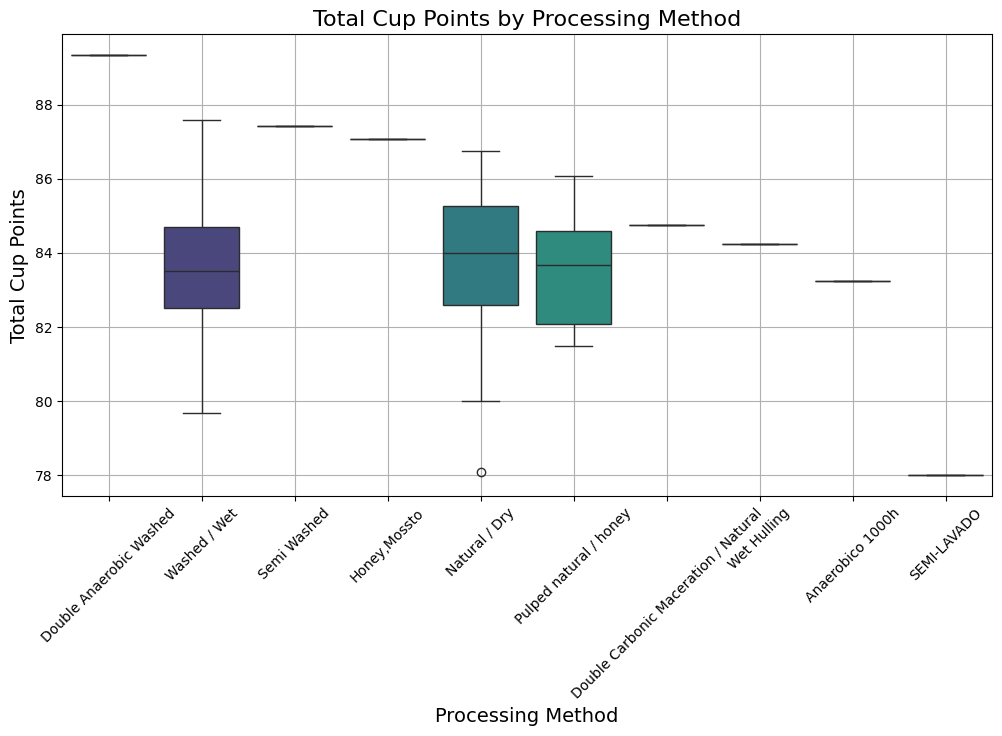

ANOVA result for Processing Method: F-value = nan, p-value = nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning:

at least one input has length 0



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway, pearsonr
import plotly.express as px

data = pd.read_csv('df_arabica_clean.csv')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Processing Method', y='Total Cup Points', data=data, palette='viridis')
plt.title('Total Cup Points by Processing Method', fontsize=16)
plt.xlabel('Processing Method', fontsize=14)
plt.ylabel('Total Cup Points', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ANOVA test to see if the differences are statistically significant
anova_result = f_oneway(*(data[data['Processing Method'] == method]['Total Cup Points'] for method in data['Processing Method'].unique()))
print(f"ANOVA result for Processing Method: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

#Hypothesis 2: Country of Origin and Coffee Quality

<ipython-input-57-84aaba19e67e>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




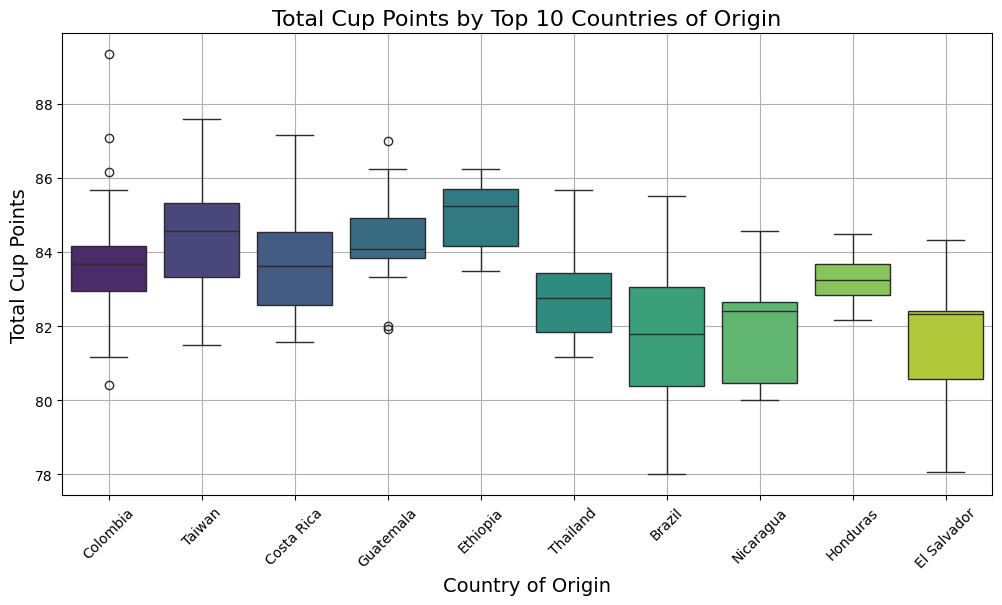

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway, pearsonr
import plotly.express as px

data = pd.read_csv('df_arabica_clean.csv')

# Boxplot for Country of Origin and Total Cup Points (top 10 countries)
plt.figure(figsize=(12, 6))
top_countries = data['Country of Origin'].value_counts().head(10).index
filtered_data = data[data['Country of Origin'].isin(top_countries)]
sns.boxplot(x='Country of Origin', y='Total Cup Points', data=filtered_data, palette='viridis')
plt.title('Total Cup Points by Top 10 Countries of Origin', fontsize=16)
plt.xlabel('Country of Origin', fontsize=14)
plt.ylabel('Total Cup Points', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





Hypothesis 3: Correlation Among Coffee Attributes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway, pearsonr
import plotly.express as px

data = pd.read_csv('df_arabica_clean.csv')

# Print correlations with Total Cup Points
correlations_with_total_cup_points = correlation_matrix['Total Cup Points'].sort_values(ascending=False)
print(correlations_with_total_cup_points)




Total Cup Points        1.000000
Acidity                 0.982946
Flavor                  0.967247
Aroma                   0.959024
Balance                 0.937937
Aftertaste              0.918630
Overall                 0.918559
Body                    0.868092
Moisture Percentage     0.750577
Category One Defects   -0.327327
Altitude               -0.604390
Quakers                -0.816497
Category Two Defects   -0.816497
Name: Total Cup Points, dtype: float64


Hypothesis 4: Impact of Moisture and Defects on Coffee Quality

<ipython-input-59-4555149de725>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



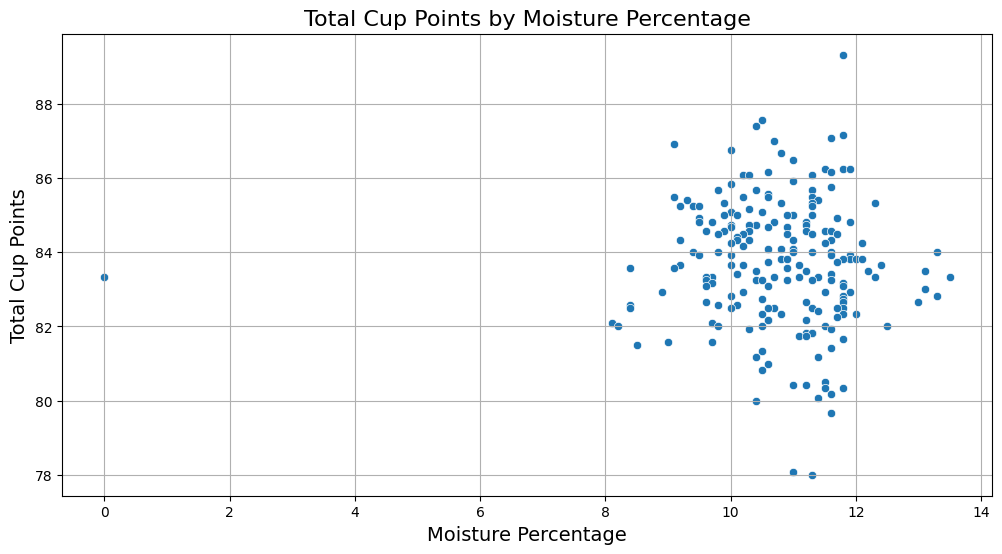

Correlation between Moisture Percentage and Total Cup Points: r = -0.04647603481224195, p-value = 0.5060607209756095


<ipython-input-59-4555149de725>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




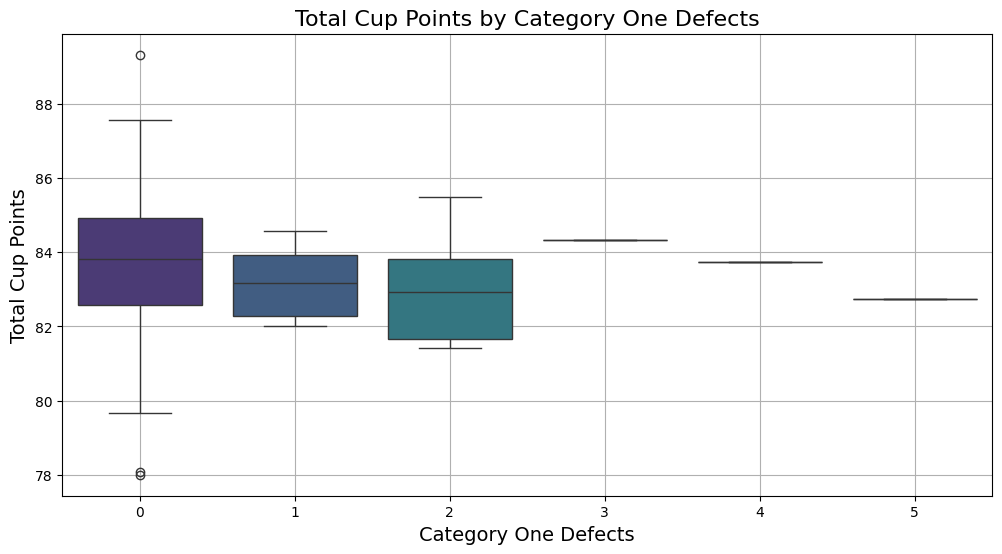

<ipython-input-59-4555149de725>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




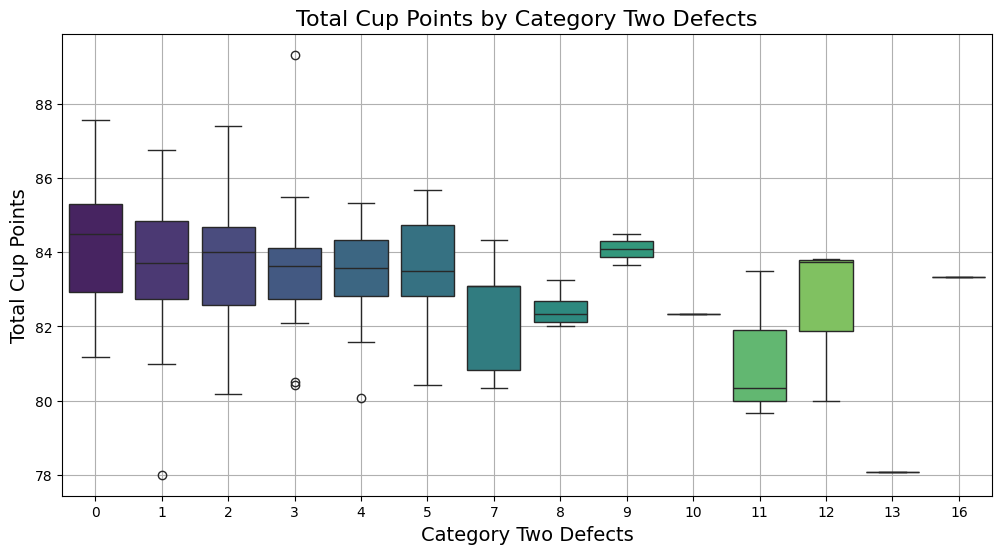

In [ ]:
data = pd.read_csv('df_arabica_clean.csv')

# Scatter plot for Moisture Percentage and Total Cup Points
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Moisture Percentage', y='Total Cup Points', data=data, palette='viridis')
plt.title('Total Cup Points by Moisture Percentage', fontsize=16)
plt.xlabel('Moisture Percentage', fontsize=14)
plt.ylabel('Total Cup Points', fontsize=14)
plt.grid(True)
plt.show()

# Correlation between Moisture Percentage and Total Cup Points
correlation_moisture = pearsonr(data['Moisture Percentage'], data['Total Cup Points'])
print(f"Correlation between Moisture Percentage and Total Cup Points: r = {correlation_moisture[0]}, p-value = {correlation_moisture[1]}")

# Boxplot for Category One Defects and Total Cup Points
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category One Defects', y='Total Cup Points', data=data, palette='viridis')
plt.title('Total Cup Points by Category One Defects', fontsize=16)
plt.xlabel('Category One Defects', fontsize=14)
plt.ylabel('Total Cup Points', fontsize=14)
plt.grid(True)
plt.show()

# Boxplot for Category Two Defects and Total Cup Points
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category Two Defects', y='Total Cup Points', data=data, palette='viridis')
plt.title('Total Cup Points by Category Two Defects', fontsize=16)
plt.xlabel('Category Two Defects', fontsize=14)
plt.ylabel('Total Cup Points', fontsize=14)
plt.grid(True)
plt.show()
